<a href="https://colab.research.google.com/github/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/09-M%C3%A9todos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Eliminación Gaussiana

En todas las implementaciones, observar el argumento por default en el llamado a la función

Implementación usando vectorización de Numpy

In [ ]:
def eliminacion_gaussiana(A,b,resultados_parciales=False):
    '''
    Esta función calcula la solución de un sistema de ecuaciones Ax=b usando Eliminación Gaussiana para llevar la
    matriz A a su forma triangular superior y después realiza la sustitución hacia atrás.
    '''
    n = A.shape[0]
    assert b.shape[0] == n  # Aquí nos aseguramos que la forma de b sea compatible con la forma de A
    A = np.hstack((A,b.reshape(-1,1))) # Formamos la matriz aumentada del sistema
    if resultados_parciales: print("Inicial:\n", A) # Podemos escribir el if en una sola línea
    for k in range(n-1): # Recorremos cada columna
        for i in range(k+1,n): # Recorremos de la diagonal hacia adelante
            ratio = A[i,k]/A[k,k]
            A[i] = A[i]-ratio*A[k] # En este punto usamos la vectorización
            if resultados_parciales: print(A)
    if resultados_parciales: print("Forward elimination:\n",A)
    variables = A[:,n]
    for k in reversed(range(n)): # Realizamos la sustitución hacia atras
        for j in range(k+1,n):
            variables[k] = variables[k] - A[k,j]*variables[j] # Otra vez, usamos vectorización
        variables[k] = variables[k]/A[k,k]
    return variables

Ahora, incluyamos el pivoteo parcial. Esto lo hacemos manipulando los índices de los arreglos de numpy.

In [ ]:
def eliminacion_gaussiana_pp(A,b,resultados_parciales=False):
    '''
    Esta función calcula la solución de un sistema de ecuaciones Ax=b usando Eliminación Gaussiana con
    pivoteo parcial para llevar la matriz A a su forma triangular superior y después realiza la
    sustitución hacia atrás.
    '''
    n = A.shape[0]
    assert b.shape[0] == n
    A = np.hstack((A,b.reshape(-1,1))) # Formamos la matriz aumentada del sistema
    if resultados_parciales: print("Inicial:\n", A)
    for k in range(n-1):
        #------- Pivoteo parcial -------
        idx_max = np.argmax(np.abs(A[k:,k])) + k
        new_idxs = list(range(A.shape[0]))
        new_idxs[k] = idx_max
        new_idxs[idx_max] = k
        A = A[new_idxs]
        #--------------------------------
        if resultados_parciales: print("cambio de renglones:\n",A)
        for i in range(k+1,n):
            ratio = A[i,k]/A[k,k]
            A[i] = A[i]-ratio*A[k] # En este punto usamos la vectorización
            if resultados_parciales: print(A)
    if resultados_parciales: print("Forward elimination:\n",A)
    variables = A[:,n]
    for k in reversed(range(n)):
        for j in range(k+1,n):
            variables[k] = variables[k] - A[k,j]*variables[j] # Otra vez, usamos vectorización
        variables[k] = variables[k]/A[k,k]
    return variables

## Aspectos importantes

¿Cómo juntamos arreglos en uno solo?

In [ ]:
A = np.array([[3,2,1],[5,3,4],[1,1,-1]],dtype=float)
b = np.array([1,2,1],dtype=float)

print(A)
print(b.reshape(-1,1))
np.hstack((A,b.reshape(-1,1)))

¿Cómo intercambiamos dos líneas de un arreglo?

In [ ]:
A = np.array([[3,2,1],[5,3,4],[1,1,-1]],dtype=float)
print(A)
new_idxs = [2,1,0]
A = A[new_idxs]  # Aquí hacemos la permutación
print(A)

## Ejemplo 1

### Usando nuestra implementación

In [ ]:
A = np.array([[3,2,1],[5,3,4],[1,1,-1]],dtype=float)
b = np.array([1,2,1],dtype=float)
print(A,"\n\n",b)

In [ ]:
eliminacion_gaussiana(A,b)

In [ ]:
eliminacion_gaussiana_pp(A,b,resultados_parciales=True)

### Usando implementaciones de Python

Usando numpy.

In [ ]:
import numpy as np

np.linalg.solve(A,b)

In [ ]:
np.linalg.inv(A)@b

Usando [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide)

In [ ]:
import scipy

scipy.linalg.solve(A,b)

En el siguiente ejemplo vemos que, en general, necesitamos el método con pivoteo parcial

In [ ]:
A = np.array([[0,2,1],[5,0,4],[1,1,-1]],dtype=float)
b = np.array([1,2,1],dtype=float)
print(A,"\n\n",b,"\n")

print(f"Eliminación Gaussiana sin pivoteo parcial\n{eliminacion_gaussiana(A,b)}\n")
print(f"Eliminación Gaussiana con pivoteo parcial\n{eliminacion_gaussiana_pp(A,b)}\n")
print(f"Usando el solver de numpy\n{np.linalg.solve(A,b)}")

Comparemos el tiempo de ejecución de ambas opciones (la propia y la de Python):

In [ ]:
import time
import scipy

# --- opción 1 ---
inicio = time.time()
sol = eliminacion_gaussiana(A,b)
final = time.time()
print(f"Duración (EG): {final-inicio} segundos")

# --- opción 2 ---
inicio = time.time()
sol = eliminacion_gaussiana_pp(A,b)
final = time.time()
print(f"Duración (EGpp): {final-inicio} segundos")

# --- opción 3 ---
inicio = time.time()
sol = np.linalg.solve(A,b)
final = time.time()
print(f"Duración (numpy): {final-inicio} segundos")

# --- opción 4 ---
inicio = time.time()
sol = scipy.linalg.solve(A,b)
final = time.time()
print(f"Duración (scipy): {final-inicio} segundos")

Ahora, veamos con un ejemplo grande

In [ ]:
import numpy as np

np.random.seed(22)
Ab = np.random.normal(size=(200,201))

A = Ab[:,:-1].copy()
b = Ab[:,-1].copy()
print(f"Determinante de A: {np.linalg.det(A)}")

In [ ]:
import time
import scipy

# --- opción 2 ---
inicio = time.time()
sol = eliminacion_gaussiana_pp(A,b)
final = time.time()
print(f"Duración (EGpp): {final-inicio} segundos")

# --- opción 3 ---
inicio = time.time()
sol = np.linalg.solve(A,b)
final = time.time()
print(f"Duración (numpy): {final-inicio} segundos")

# --- opción 4 ---
inicio = time.time()
sol = scipy.linalg.solve(A,b)
final = time.time()
print(f"Duración (scipy): {final-inicio} segundos")

# Regla de Simpson para integrar

In [ ]:
def simpson_compuesta(f,a,b,n):
    '''
    f:          Funcion
    [a,b]:      Intervalo de integración
    n:          Número de subintervalos a considerar
    prom_df4:   Promedio de la segunda derivada en el intervalo
    int_real:   Valor real de la integral en el intervalo [a,b]
    '''
    if a<=b and n%2==0: # Hay que verificar que el número de subintervalos sea par
        # --- Cálculo de la aproximación a la integral ---
        h = (b-a)/n
        nodos = np.linspace(a,b,n+1)
        suma_nodos_pares = 0
        suma_nodos_impares = 0
        for j in range(n//2):
            suma_nodos_impares += f(a + (2*j+1)*h)
        for j in range(1,n//2):
            suma_nodos_pares += f(a + (2*j)*h)
        aproximacion = (b-a)*(f(a)+4*suma_nodos_impares+2*suma_nodos_pares+f(b))/(3*n)
        resultado = {'aproximación': aproximacion}
        # --- Cálculo del error aproximado ---
        if int_real is not None:
            error = error_relativo(int_real,aproximacion)
            resultado['error relativo'] = error
        if prom_df4 is not None:
            error_aprox = -(prom_df4*(b-a)**5)/(180*n**4)
            resultado['error aproximado'] = error_aprox
        return resultado
    else:
        print("revisar los parámetros")

# Métodos de Runge-Kutta

La siguiente es una implementación de los métodos de Runge-Kutta de orden 2, 3 y 4 en una clase. De esta forma, se considera como si el método estuviera *empaquetado* en un objeto que contiene métodos y atributos. Esto genera una implementación más versatil y limpia.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

class RungeKutta:
    '''
    Implementación de los métodos de Runge-Kutta de orden 2,3,4 para resolver EDOs escalares
    '''

    def __init__(self,f,sol=None,order=3,a_order2=None,name=None):
        # super().__init__(f,sol)
        self.f = f
        self.sol = sol
        assert order==2 or order==3 or order==4
        self.order = order
        if name is not None:
            name_meaning_dict = {'Euler': 0,
                                 'Heun': 0.5,
                                 'Mid': 1,
                                 'Ralston': 2/3}
            if name in name_meaning_dict.keys():
                self.a2 = name_meaning_dict[name]
                self.__get_params()
                self.order = 2
            else:
                raise KeyError(f"Nombre no valido: {name}")
        else:
            if self.order == 2:
                assert a_order2 is not None
                self.a2 = a_order2
                self.__get_params()

    def __get_params(self):
        '''
        función que obtiene el resto de parametros de RK de orden 2 a partir del valor de a2
        '''
        self.a1 = 1-self.a2
        if self.a2!=0:
            self.p = 1/(2*self.a2)
        else:
            self.p = 1
        self.q = self.p

    def fit(self,a,b,h,x0,y0):
        assert a==x0        
        self.a = a
        self.b = b
        self.h = h
        n = int((b-a)/h)
        xs = np.linspace(a,b,n+1)
        ys = np.zeros_like(xs)
        ys[0] = y0
        for j in range(1,n+1):
            k1 = self.f(xs[j-1],ys[j-1])
            if self.order==2:
                k2 = self.f(xs[j-1]+self.p*h,ys[j-1]+self.q*k1*h)
                ys[j] = ys[j-1] + (self.a1*k1 + self.a2*k2)*h 
            else:
                k2 = self.f(xs[j-1]+0.5*h,ys[j-1]+0.5*k1*h)
                if self.order==3:
                    k3 = self.f(xs[j-1]+h,ys[j-1]-k1*h + 2*k2*h)
                    ys[j] = ys[j-1] + (1/6)*(k1 + 4*k2+k3)*h
                elif self.order==4:
                    k3 = self.f(xs[j-1]+0.5*h,ys[j-1] + 0.5*k2*h)
                    k4 = self.f(xs[j-1]+h,ys[j-1] + k3*h)
                    ys[j] = ys[j-1] + (1/6)*(k1 + 2*k2+2*k3+k4)*h
        self.xs = xs 
        self.ys = ys

    def plot(self,plot_nodes=True):
        xaxis = np.linspace(self.a,self.b,100)
        plt.figure(dpi=100)
        plt.plot(self.xs,self.ys,color='blue',label='Solución aprox')
        if plot_nodes:
            plt.scatter(self.xs,self.ys,color='blue')
        if self.sol is not None:
            plt.plot(xaxis,[self.sol(x) for x in xaxis],color='red',label='Solución real')
            plt.legend(loc='best')
        if self.h>0.2:
            plt.xticks(self.xs)
        plt.show()      

    def table(self,num_digits=4):
        if self.sol is not None:
            valores_reales = self.sol(self.xs)
            errores_relativos = (self.sol(self.xs) - self.ys)/self.sol(self.xs)
            print_table(self.xs,self.ys,valores_reales,errores_relativos,num_digits)
            self.reales = valores_reales
            self.ers = errores_relativos
        else:
            print_table(self.xs,self.ys,num_digits=num_digits)

def print_table(xs,ys,yrs=None,ers=None,num_digits=4):
    n = num_digits
    if yrs is not None and ers is not None:
        print("x\ty\ty real\terror rel")
        for x,y,y_real,er in zip(xs,ys,yrs,ers):
            print(f"{round(x,n)}\t{round(y,n)}\t{round(y_real,n)}\t{round(er,n)}")
    elif yrs is None and ers is None:
        print("x\ty\t")
        for x,y in zip(xs,ys):
            print(f"{round(x,n)}\t{round(y,n)}")

In [5]:
f = lambda x,y: -2*x**3 + 12*x**2 - 20*x + 8.5
sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

a = 0
b = 4
h = 0.5
x0 = 0
y0 = 1

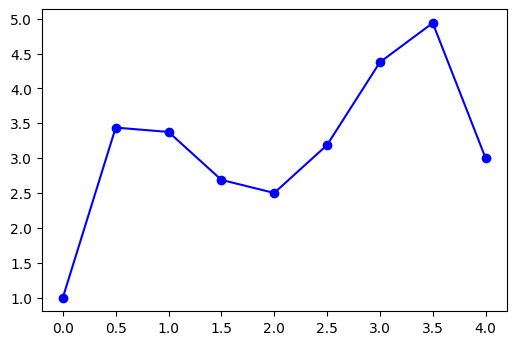

x	y	
0.0	1.0
0.5	3.4375
1.0	3.375
1.5	2.6875
2.0	2.5
2.5	3.1875
3.0	4.375
3.5	4.9375
4.0	3.0


In [14]:
solver = RungeKutta(f=f,
                    name='Heun')

solver.fit(a,b,h,x0,y0)
solver.plot(plot_nodes=True)
solver.table()

In [15]:
solver.xs

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [16]:
solver.h

0.5